# Liner Regression
Trainer : - Rajesh Jakhotia

In [1]:
### Data File: inc_exp_data.csv
#### The file contains data about Households, their Income & Expenses

## Attributes
#### 1: Mthly_HH_Income: Monthly Household Income
#### 2: Mthly_HH_Expense: Monthly Household Expense
#### 3: No_of_Fly_Members: No of Family Members
#### 4: Emi_or_Rent_Amt: Monthly EMI or Rent Expense 
#### 5: Annual_HH_Income: Annual Household Income
#### 6: Highest_Qualified_Member: Qualification of Highest Qualified Member in the Family
#### 7: No_of_Earning_Members: Number of Earning Members in the Household

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline

In [3]:
inc_exp = pd.read_csv("Inc_Exp_Data.csv")
inc_exp.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members
0,5000,8000,3,2000,64200,Under-Graduate,1
1,6000,7000,2,3000,79920,Illiterate,1
2,10000,4500,2,0,112800,Under-Graduate,1
3,10000,2000,1,0,97200,Illiterate,1
4,12500,12000,2,3000,147000,Graduate,1


## Simple Linear Regression
## Linear Regression between Expense ~ Income

### Step 1: Scatter Plot to visually see the trend

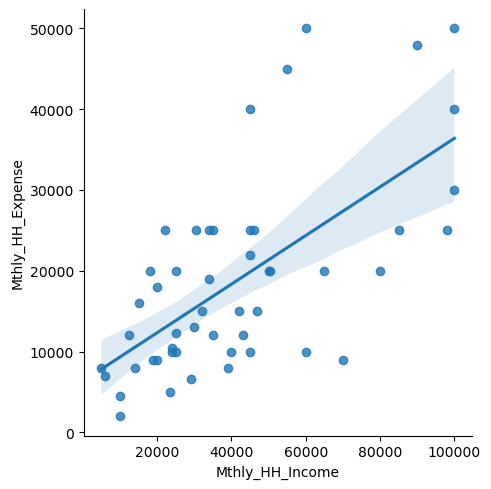

In [4]:
## Scatter Plot
import seaborn as sns
sns.lmplot(x ="Mthly_HH_Income", 
           y = "Mthly_HH_Expense", data = inc_exp)

In [5]:
## Simple Linear Regression Model
import statsmodels.formula.api as sma
import statsmodels.api as sm
linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income" , 
                    data = inc_exp).fit()

In [6]:
#Get the model summary
linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     34.97
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           3.40e-07
Time:                        22:39:45   Log-Likelihood:                -526.77
No. Observations:                  50   AIC:                             1058.
Df Residuals:                      48   BIC:                             1061.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        6319.1018   2488.733      2.539      0.014    1315.168    1.13e+04
Mthly_HH_Income     0.3008      0.051      5.914      0.000       0.198       0.403
==============================================================================
Omnibus:                        6.455   Durbin-Watson:                   2.417
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.471
Skew:                           0.774   Prob(JB):                       0.0649
Kurtosis:                       3.479   Cond. No.                     9.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### R Squared Calculation

In [7]:
def fn_rsquared(y, yhat):   
    ybar = y.mean()
    sst = sum(pow((y - ybar),2))
    sse = sum(pow((y - y_hat),2))
    ssr = sst-sse
    r_sq = ssr/sst
    return r_sq

In [8]:
y_hat = linear_mod.predict(inc_exp["Mthly_HH_Income"])
fn_rsquared(inc_exp["Mthly_HH_Expense"], y_hat)

0.4214804472359623

## Multiple Linear Regression

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

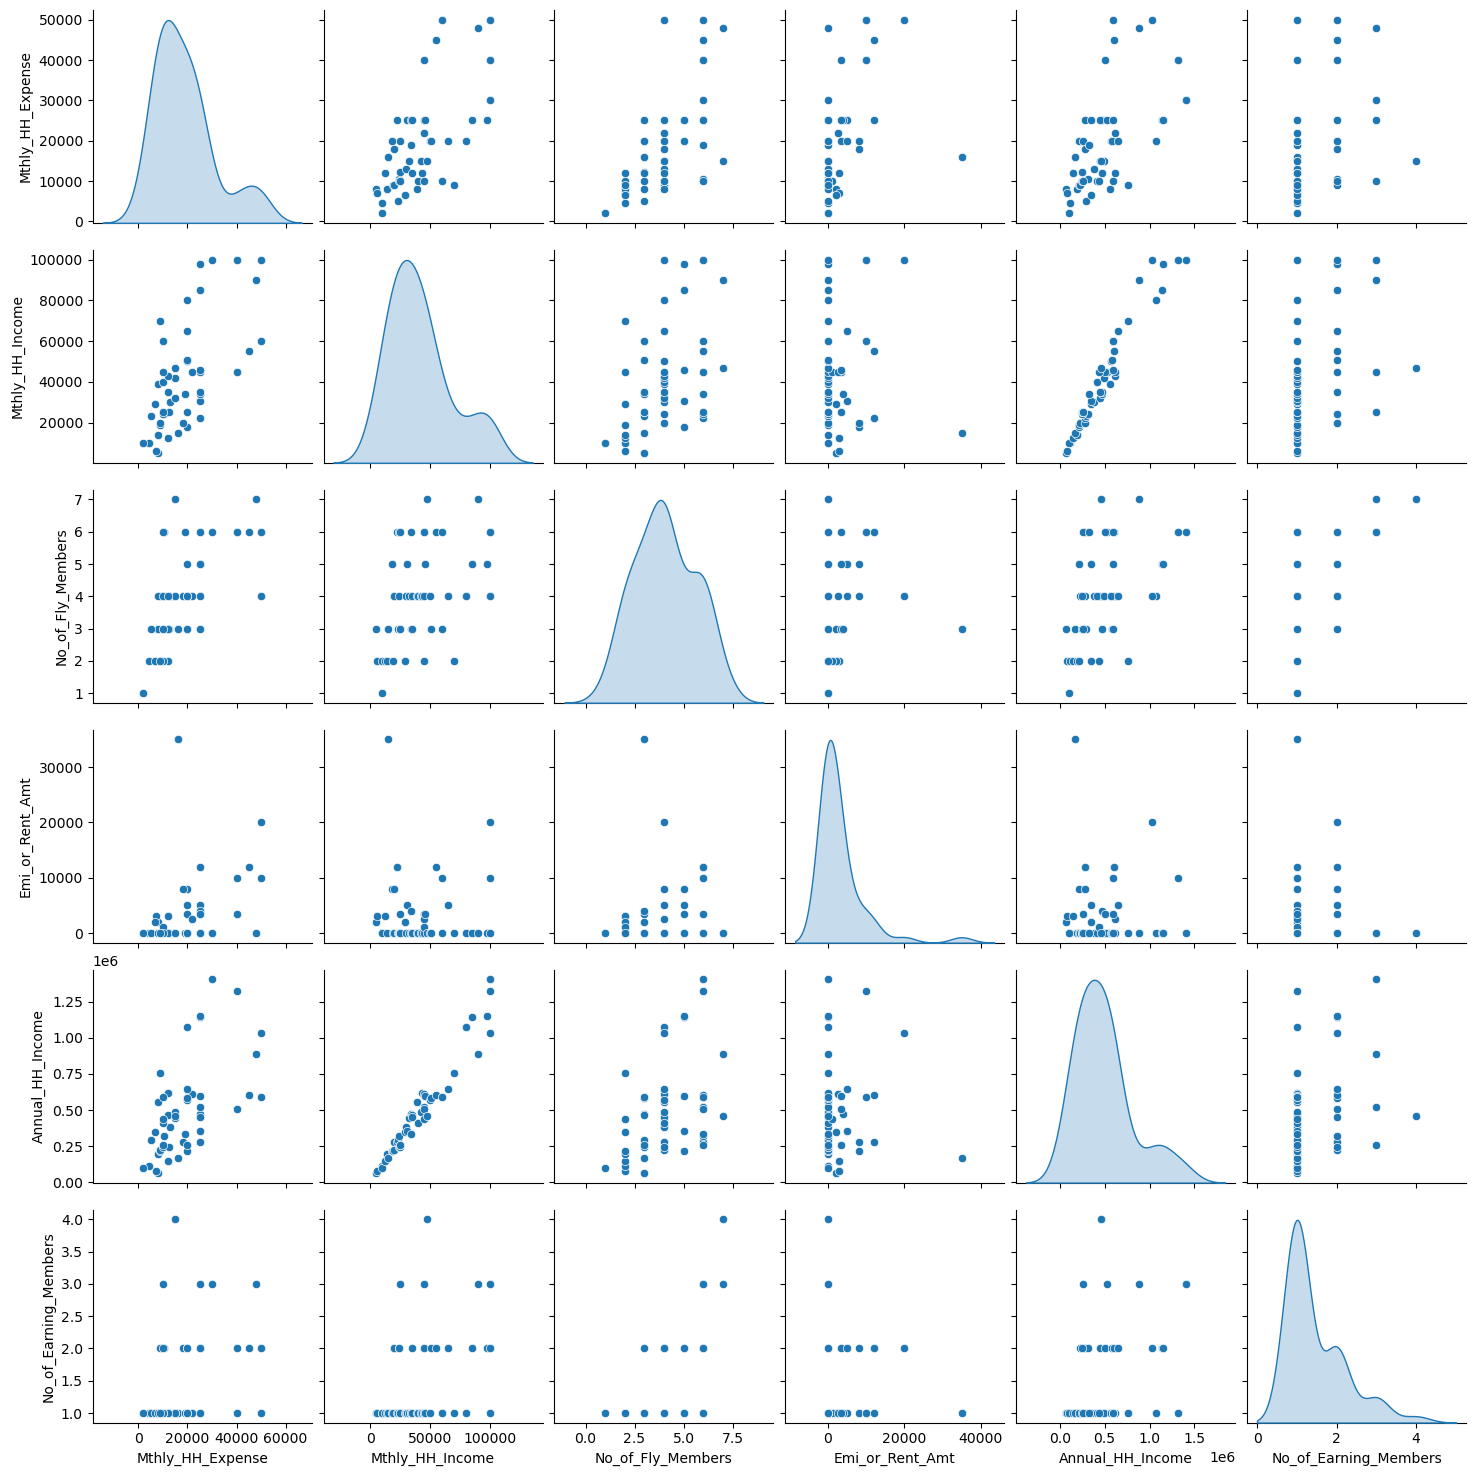

In [10]:
sns.pairplot(inc_exp[['Mthly_HH_Expense', 'Mthly_HH_Income', 'No_of_Fly_Members', 
                      'Emi_or_Rent_Amt', 'Annual_HH_Income', 'No_of_Earning_Members' ]], diag_kind = 'kde')

In [11]:
## Correlation check 
inc_exp.corr(numeric_only=True)

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,No_of_Earning_Members
Mthly_HH_Income,1.000000,0.649215,0.448317,0.036976,0.970315,0.347883
Mthly_HH_Expense,0.649215,1.000000,0.639702,0.405280,0.591222,0.311915
No_of_Fly_Members,0.448317,0.639702,1.000000,0.085808,0.430868,0.597482
Emi_or_Rent_Amt,0.036976,0.405280,0.085808,1.000000,0.002716,-0.097431
Annual_HH_Income,0.970315,0.591222,0.430868,0.002716,1.000000,0.296679
No_of_Earning_Members,0.347883,0.311915,0.597482,-0.097431,0.296679,1.000000


<Axes: >

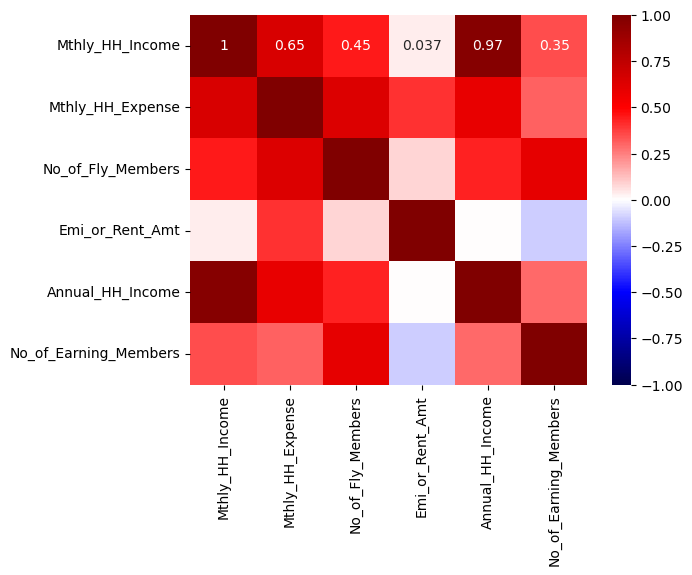

In [12]:
## Correlation Output
sns.heatmap(inc_exp.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap='seismic')

### Multiple Linear Regression - Adjusted R-Squared 

In [13]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+ No_of_Fly_Members",
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     31.61
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.00e-09
Time:                        22:39:53   Log-Likelihood:                -519.14
No. Observations:                  50   AIC:                             1044.
Df Residuals:                      47   BIC:                             1050.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -4030.2745   3324.071     -1.212      0.231   -1.07e+04    2656.894
Mthly_HH_Income       0.2101      0.049      4.257      0.000       0.111       0.309
No_of_Fly_Members  3476.7390    849.017      4.095      0.000    1768.738    5184.740
==============================================================================
Omnibus:                        3.943   Durbin-Watson:                   2.281
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.133
Skew:                           0.604   Prob(JB):                        0.209
Kurtosis:                       3.209   Cond. No.                     1.45e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt",
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           5.17e-12
Time:                        22:39:53   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
inc_exp['Sr_No'] = np.arange(1,51)
inc_exp

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Sr_No
0,5000,8000,3,2000,64200,Under-Graduate,1,1
1,6000,7000,2,3000,79920,Illiterate,1,2
2,10000,4500,2,0,112800,Under-Graduate,1,3
3,10000,2000,1,0,97200,Illiterate,1,4
4,12500,12000,2,3000,147000,Graduate,1,5
5,14000,8000,2,0,196560,Graduate,1,6
6,15000,16000,3,35000,167400,Post-Graduate,1,7
7,18000,20000,5,8000,216000,Graduate,1,8
8,19000,9000,2,0,218880,Under-Graduate,1,9
9,20000,9000,4,0,220800,Under-Graduate,2,10


In [16]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt+\
                      Sr_No", data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     26.53
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.45e-11
Time:                        22:39:53   Log-Likelihood:                -510.17
No. Observations:                  50   AIC:                             1030.
Df Residuals:                      45   BIC:                             1040.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5532.9739   2889.283     -1.915      0.062   -1.14e+04     286.341
Mthly_HH_Income       0.1195      0.119      1.004      0.321      -0.120       0.359
No_of_Fly_Members  3127.4765    738.572      4.234      0.000    1639.917    4615.036
Emi_or_Rent_Amt       0.7123      0.162      4.407      0.000       0.387       1.038
Sr_No               176.8449    216.132      0.818      0.418    -258.468     612.158
==============================================================================
Omnibus:                        0.389   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.165
Skew:                           0.141   Prob(JB):                        0.921
Kurtosis:                       3.005   Cond. No.                     1.48e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Understanding Beta Coefficients
#### Sign of the Beta Coefficients
#### p-Value of Attributes

In [17]:
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt" ,data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           5.17e-12
Time:                        22:39:53   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multi-Collinearity

### Variance Inflation Factor

In [18]:
m_linear_mod = sma.ols(formula ="Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt + Annual_HH_Income",
                       data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     27.40
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           1.48e-11
Time:                        22:39:53   Log-Likelihood:                -509.59
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      45   BIC:                             1039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5124.8763   2818.362     -1.818      0.076   -1.08e+04     551.597
Mthly_HH_Income       0.4092      0.157      2.608      0.012       0.093       0.725
No_of_Fly_Members  3224.4195    719.071      4.484      0.000    1776.136    4672.703
Emi_or_Rent_Amt       0.6569      0.158      4.162      0.000       0.339       0.975
Annual_HH_Income     -0.0167      0.013     -1.314      0.196      -0.042       0.009
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   2.377
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.013
Skew:                           0.035   Prob(JB):                        0.993
Kurtosis:                       2.963   Cond. No.                     1.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
## Variance Inflation Factor (VIF) for Multi-Collinearity Check
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF(formula,data):
    y , X = dmatrices(formula,data = data,return_type="dataframe")
    vif = pd.DataFrame()
    vif["Var_Name"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) \
       for i in range(X.shape[1])]
    return(vif.round(1))

vif_check =VIF("Mthly_HH_Expense ~ Mthly_HH_Income+\
        No_of_Fly_Members+ Emi_or_Rent_Amt " ,data = inc_exp)
vif_check 

,Var_Name,VIF
0,Intercept,8.6
1,Mthly_HH_Income,1.3
2,No_of_Fly_Members,1.3
3,Emi_or_Rent_Amt,1.0


## Variable Transformation

In [20]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Emi_or_Rent_Amt",
                      data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     35.40
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           5.17e-12
Time:                        22:39:53   Log-Likelihood:                -510.53
No. Observations:                  50   AIC:                             1029.
Df Residuals:                      46   BIC:                             1037.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5148.0704   2840.472     -1.812      0.076   -1.09e+04     569.503
Mthly_HH_Income       0.2104      0.042      5.009      0.000       0.126       0.295
No_of_Fly_Members  3232.5739    724.699      4.461      0.000    1773.830    4691.318
Emi_or_Rent_Amt       0.6851      0.158      4.347      0.000       0.368       1.002
==============================================================================
Omnibus:                        0.916   Durbin-Watson:                   2.326
Prob(Omnibus):                  0.633   Jarque-Bera (JB):                0.560
Skew:                           0.258   Prob(JB):                        0.756
Kurtosis:                       3.041   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

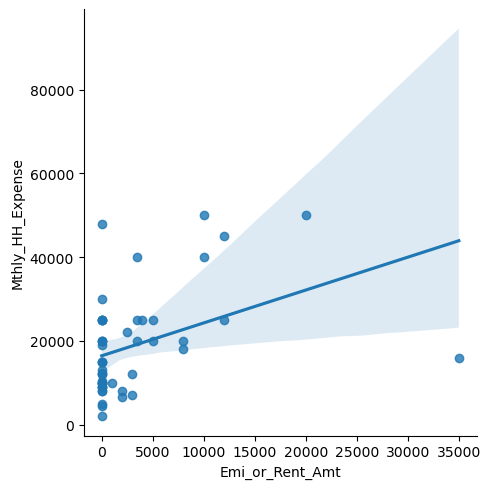

In [21]:
sns.lmplot(x ="Emi_or_Rent_Amt", 
           y = "Mthly_HH_Expense", data = inc_exp)

(array([36.,  6.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  1.]),
 array([    0.,  3500.,  7000., 10500., 14000., 17500., 21000., 24500.,
        28000., 31500., 35000.]),
 <BarContainer object of 10 artists>)

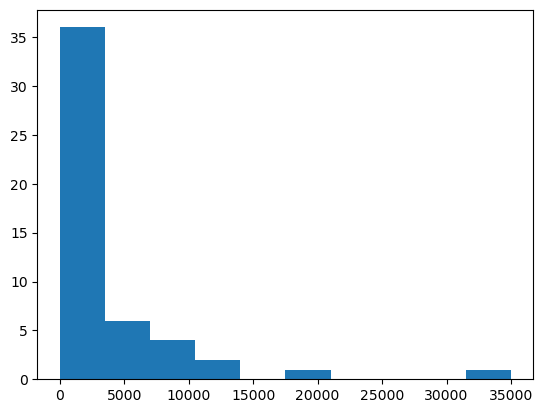

In [22]:
plt.hist(inc_exp['Emi_or_Rent_Amt'])

(array([30.,  0.,  0.,  0.,  0.,  0.,  1.,  9.,  8.,  2.]),
 array([ 0.        ,  1.04631319,  2.09262638,  3.13893957,  4.18525276,
         5.23156596,  6.27787915,  7.32419234,  8.37050553,  9.41681872,
        10.46313191]),
 <BarContainer object of 10 artists>)

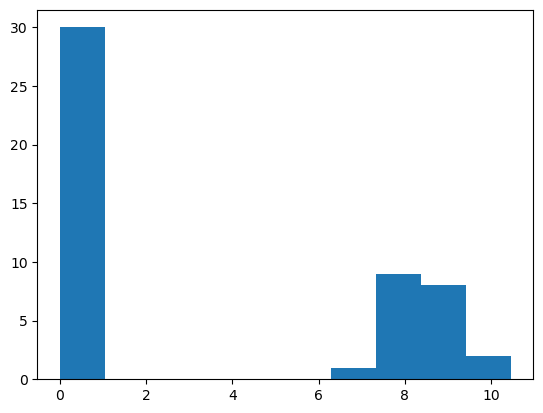

In [23]:
inc_exp['Ln_Emi_or_Rent_Amt'] = np.log(inc_exp['Emi_or_Rent_Amt'] + 1)
plt.hist(inc_exp['Ln_Emi_or_Rent_Amt'])

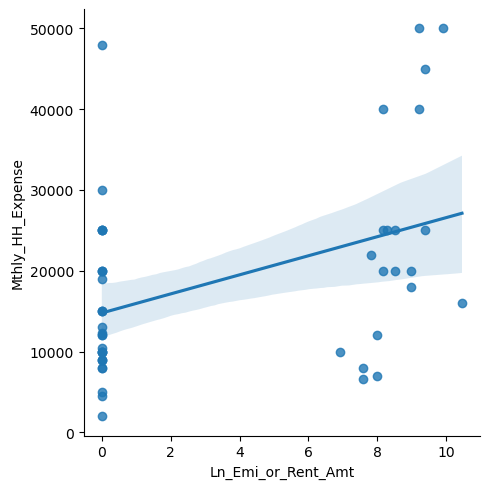

In [24]:
sns.lmplot(x ="Ln_Emi_or_Rent_Amt", 
           y = "Mthly_HH_Expense", data = inc_exp)

In [25]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members + Ln_Emi_or_Rent_Amt  ",
                      data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     48.36
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           2.87e-14
Time:                        22:39:55   Log-Likelihood:                -504.85
No. Observations:                  50   AIC:                             1018.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -7948.7852   2608.949     -3.047      0.004   -1.32e+04   -2697.243
Mthly_HH_Income        0.2286      0.038      6.078      0.000       0.153       0.304
No_of_Fly_Members   3219.5047    646.275      4.982      0.000    1918.620    4520.389
Ln_Emi_or_Rent_Amt  1224.0029    205.497      5.956      0.000     810.360    1637.646
==============================================================================
Omnibus:                        2.733   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.615
Skew:                           0.519   Prob(JB):                        0.271
Kurtosis:                       2.581   Cond. No.                     1.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
inc_exp["Flag_Emi_or_Rent"]=inc_exp["Emi_or_Rent_Amt"].map(lambda x: 1 if x>0 else 0)
inc_exp.head()

,Mthly_HH_Income,Mthly_HH_Expense,No_of_Fly_Members,Emi_or_Rent_Amt,Annual_HH_Income,Highest_Qualified_Member,No_of_Earning_Members,Sr_No,Ln_Emi_or_Rent_Amt,Flag_Emi_or_Rent
0,5000,8000,3,2000,64200,Under-Graduate,1,1,7.601402,1
1,6000,7000,2,3000,79920,Illiterate,1,2,8.006701,1
2,10000,4500,2,0,112800,Under-Graduate,1,3,0.000000,0
3,10000,2000,1,0,97200,Illiterate,1,4,0.000000,0
4,12500,12000,2,3000,147000,Graduate,1,5,8.006701,1


In [27]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members + Ln_Emi_or_Rent_Amt + Flag_Emi_or_Rent ",
                      data = inc_exp).fit()

m_linear_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     39.34
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           3.76e-14
Time:                        22:39:55   Log-Likelihood:                -502.86
No. Observations:                  50   AIC:                             1016.
Df Residuals:                      45   BIC:                             1025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6319.7502   2672.226     -2.365      0.022   -1.17e+04    -937.611
Mthly_HH_Income        0.2232      0.037      6.087      0.000       0.149       0.297
No_of_Fly_Members   2916.0606    647.412      4.504      0.000    1612.106    4220.015
Ln_Emi_or_Rent_Amt  4393.9091   1656.153      2.653      0.011    1058.246    7729.572
Flag_Emi_or_Rent   -2.758e+04   1.43e+04     -1.928      0.060   -5.64e+04    1230.383
==============================================================================
Omnibus:                        2.659   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.482
Skew:                           0.528   Prob(JB):                        0.289
Kurtosis:                       2.723   Cond. No.                     8.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
vif_check =VIF("Mthly_HH_Expense ~ Mthly_HH_Income+\
        No_of_Fly_Members+ Ln_Emi_or_Rent_Amt + Flag_Emi_or_Rent " ,data = inc_exp)
vif_check 

,Var_Name,VIF
0,Intercept,10.1
1,Mthly_HH_Income,1.3
2,No_of_Fly_Members,1.3
3,Ln_Emi_or_Rent_Amt,69.3
4,Flag_Emi_or_Rent,69.4


In [29]:
## Multiple Linear Regression
m_linear_mod = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Ln_Emi_or_Rent_Amt + Flag_Emi_or_Rent ",
                      data = inc_exp).fit()

m_linear_mod.summary()              

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     39.34
Date:                Thu, 20 Jun 2024   Prob (F-statistic):           3.76e-14
Time:                        22:39:55   Log-Likelihood:                -502.86
No. Observations:                  50   AIC:                             1016.
Df Residuals:                      45   BIC:                             1025.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -6319.7502   2672.226     -2.365      0.022   -1.17e+04    -937.611
Mthly_HH_Income        0.2232      0.037      6.087      0.000       0.149       0.297
No_of_Fly_Members   2916.0606    647.412      4.504      0.000    1612.106    4220.015
Ln_Emi_or_Rent_Amt  4393.9091   1656.153      2.653      0.011    1058.246    7729.572
Flag_Emi_or_Rent   -2.758e+04   1.43e+04     -1.928      0.060   -5.64e+04    1230.383
==============================================================================
Omnibus:                        2.659   Durbin-Watson:                   2.217
Prob(Omnibus):                  0.265   Jarque-Bera (JB):                2.482
Skew:                           0.528   Prob(JB):                        0.289
Kurtosis:                       2.723   Cond. No.                     8.39e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction using the Model

In [30]:
#prediction
y_pred = m_linear_mod.predict(inc_exp[["Mthly_HH_Income",
                                        "No_of_Fly_Members",
                                        "Ln_Emi_or_Rent_Amt",
                                        "Flag_Emi_or_Rent"]])
    


### Visually Check Predicted vs Actual values

In [31]:
tmp_df = pd.DataFrame()
tmp_df["Observed"] = inc_exp["Mthly_HH_Expense"] 
tmp_df["Expected"] = y_pred 

tmp_df.head()

,Observed,Expected
0,8000,9365.927947
1,7000,8453.908661
2,4500,1744.335887
3,2000,-1171.724698
4,12000,9904.685825


## Zero Intercept Model

In [32]:
## Multiple Linear Regression
m_linear_mod_zi = sma.ols(formula = "Mthly_HH_Expense ~ Mthly_HH_Income+\
                      No_of_Fly_Members+ Ln_Emi_or_Rent_Amt + Flag_Emi_or_Rent - 1",
                      data = inc_exp).fit()

m_linear_mod_zi.summary()              

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Mthly_HH_Expense   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              148.2
Date:                Thu, 20 Jun 2024   Prob (F-statistic):                    1.17e-25
Time:                        22:39:55   Log-Likelihood:                         -505.79
No. Observations:                  50   AIC:                                      1020.
Df Residuals:                      46   BIC:                                      1027.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Mthly_HH_Income        0.2073      0.038      5.485      0.000       0.131       0.283
No_of_Fly_Members   1787.7889    458.985      3.895      0.000     863.901    2711.677
Ln_Emi_or_Rent_Amt  5510.2951   1664.823      3.310      0.002    2159.180    8861.410
Flag_Emi_or_Rent   -3.827e+04   1.42e+04     -2.689      0.010   -6.69e+04   -9628.148
==============================================================================
Omnibus:                        9.993   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.444
Skew:                           0.950   Prob(JB):                      0.00890
Kurtosis:                       3.961   Cond. No.                     7.95e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.95e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
#prediction
y_pred_zi = m_linear_mod_zi.predict(inc_exp[["Mthly_HH_Income",
                                        "No_of_Fly_Members",
                                        "Ln_Emi_or_Rent_Amt",
                                        "Flag_Emi_or_Rent"]])
    


In [34]:
tmp_df_zi = pd.DataFrame()
tmp_df_zi["Observed"] = inc_exp["Mthly_HH_Expense"] 
tmp_df_zi["Expected"] = y_pred_zi 

tmp_df_zi.head()

,Observed,Expected
0,8000,10012.155930
1,7000,10665.014495
2,4500,5648.908751
3,2000,3861.119832
4,12000,12012.679588


## Comparing Model Performance of Intercept Model vs Zero Intercept Model

In [35]:
### Root Mean Squared Error = sqrt( (y - yhat)^2/n  )
from sklearn import metrics
print("RMSE of Intercept Model:", 
      round(np.sqrt(metrics.mean_squared_error(tmp_df["Observed"], tmp_df["Expected"])),0))
print("RMSE of Zero Intercept Model:", 
      round(np.sqrt(metrics.mean_squared_error(tmp_df["Observed"], tmp_df_zi["Expected"])),0))

RMSE of Intercept Model: 5644.0
RMSE of Zero Intercept Model: 5984.0


## Test Assumptions of Linear Regression

### Residuals should be normally distributed in Linear Regression

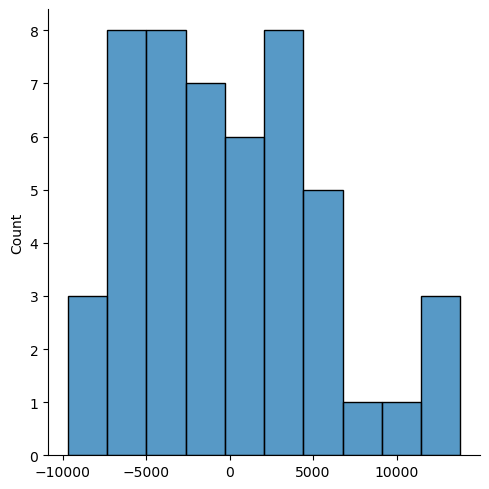

In [36]:
residual = tmp_df["Observed"] - tmp_df["Expected"]
sns.displot(residual, bins = 10)

### Error Should not have any pattern

Text(0, 0.5, 'Residual')

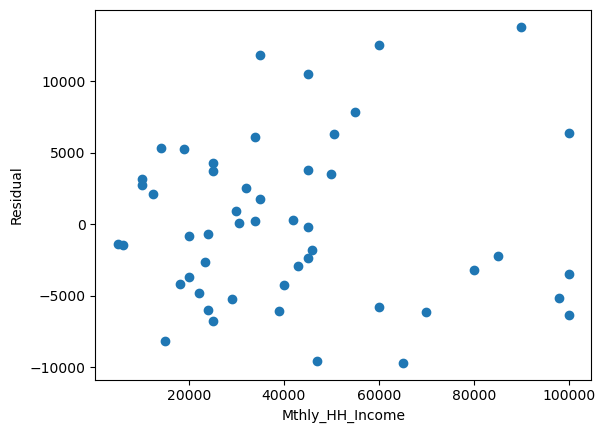

In [37]:
plt.scatter( inc_exp["Mthly_HH_Income"], residual)
plt.xlabel("Mthly_HH_Income")
plt.ylabel("Residual")

## Linear Regression using Scikit Learn

In [38]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
regr = LinearRegression() 
X_train = inc_exp[["Mthly_HH_Income", "No_of_Fly_Members", "Ln_Emi_or_Rent_Amt", "Flag_Emi_or_Rent"]]
y_train = inc_exp["Mthly_HH_Expense"]
regr.fit(X_train, y_train) 
y_pred=  regr.predict(X_train)
print("R Squared of the Model :", r2_score(y_train, y_pred)) 

R Squared of the Model : 0.7776426362274371


### Elastic Net

In [39]:
from sklearn.linear_model import ElasticNet
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(r2_score(y_train, pred_train_enet))

0.7711058575352916


# Thank you